In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

import os

### Scatter plots

In [3]:
blue_jays = pd.read_csv(os.path.join('data','blue_jays.csv'))

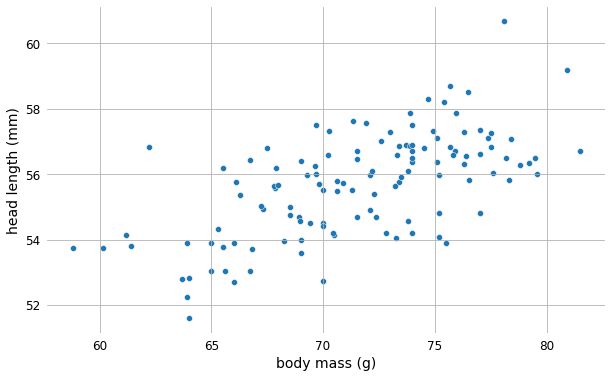

In [4]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.scatterplot(
    data = blue_jays,
    x = 'Mass',
    y = 'Head'
    )
ax.spines[:].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position("none")

ax.tick_params(axis='both', which='major', labelsize = 12)

ax.set_xlabel('body mass (g)', fontsize=14)
ax.set_ylabel('head length (mm)', fontsize=14)
ax.grid()

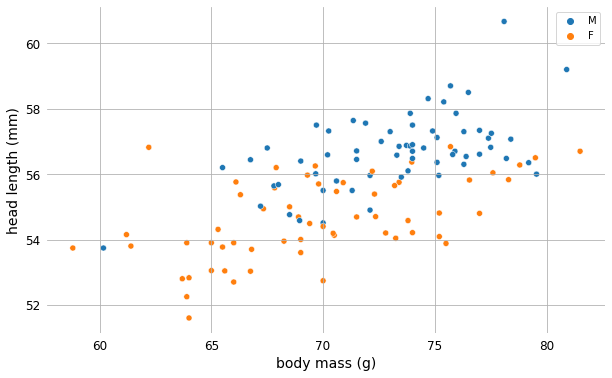

In [5]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.scatterplot(
    data = blue_jays,
    x = 'Mass',
    y = 'Head',
    hue = "KnownSex"
    )
ax.spines[:].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position("none")

ax.set_xlabel('body mass (g)', fontsize=14)
ax.set_ylabel('head length (mm)', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize = 12)
ax.legend(title='')
ax.grid()

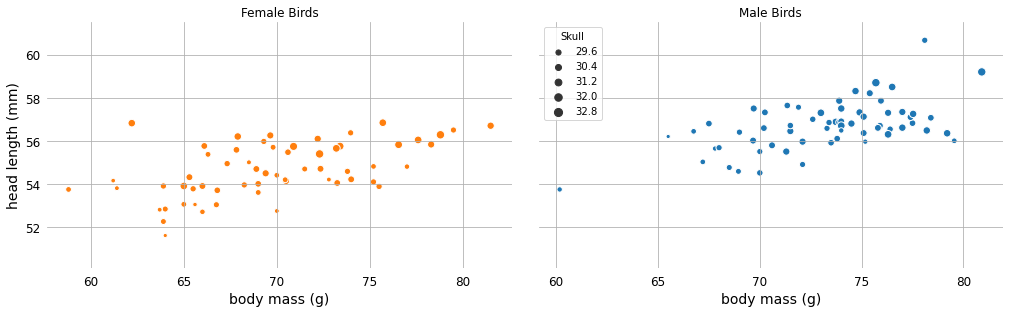

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (14,4), sharey=True)
plt.tight_layout()
sns.scatterplot(
    data = blue_jays[blue_jays['KnownSex']=='F'],
    x = 'Mass',
    y = 'Head',
    color = '#ff7f0e',
    size = 'Skull',
    edgecolor = 'w',
    linewidth = 1,
    ax = ax1
    )

sns.scatterplot(
    data = blue_jays[blue_jays['KnownSex']=='M'],
    x = 'Mass',
    y = 'Head',
    color = '#1f77b4',
    size = 'Skull',
    edgecolor = 'w',
    linewidth = 1,
    ax = ax2
    )


ax1.spines[:].set_visible(False)
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position("none")

ax1.set_xlabel('body mass (g)', fontsize=14)
ax1.set_ylabel('head length (mm)', fontsize=14)

ax1.set_ylim([50.1,61.5])
ax1.tick_params(axis='both', which='major', labelsize = 12)
ax1.get_legend().remove()
ax1.set_title('Female Birds')
ax1.grid()


ax2.spines[:].set_visible(False)
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position("none")
ax2.set_ylim([50.1,61.5])

ax2.set_xlabel('body mass (g)', fontsize=14)
ax2.set_ylabel('head length (mm)', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize = 12)
ax2.set_title('Male Birds')
ax2.grid()

### All-against-all Plot

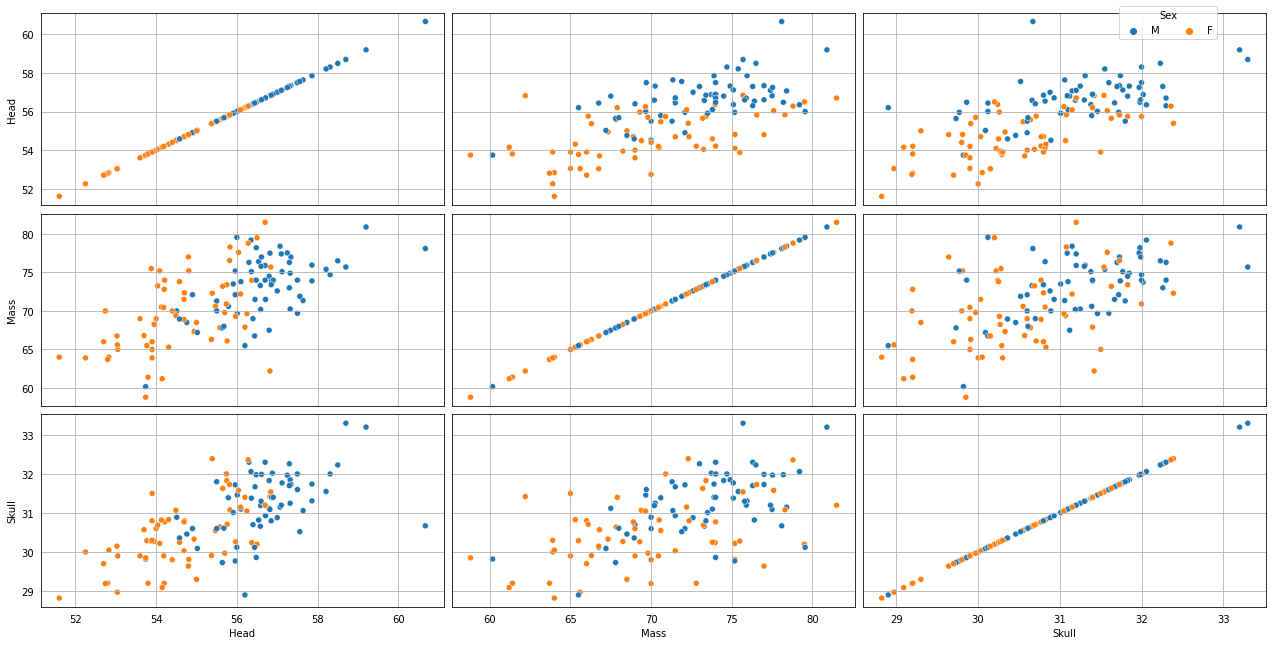

In [66]:
axes = sns.pairplot(
    data=blue_jays,
    x_vars = ['Head', 'Mass', 'Skull'],
    y_vars = ['Head', 'Mass', 'Skull'],
    hue = 'KnownSex',
    diag_kind = None,
    height = 3,
    aspect = 2,
)

for ax in axes.axes.flatten():
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.grid()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

axes._legend.remove()
handles = axes._legend_data.values()
labels = axes._legend_data.keys()


axes.fig.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor = (.91,1), title = 'Sex',ncol=2)

## 12.2 Correlograms

In [174]:
forensic_glass = pd.read_csv(os.path.join('data','forensic_glass.csv'))
corr_matrix = forensic_glass.iloc[:,:-1].corr()

In [176]:
cols = ['Ca', 'RI', 'Al', 'Mg', 'Na', 'Ba', 'K', 'Si', 'Fe']
corr_matrix = corr_matrix[cols].reindex(cols)

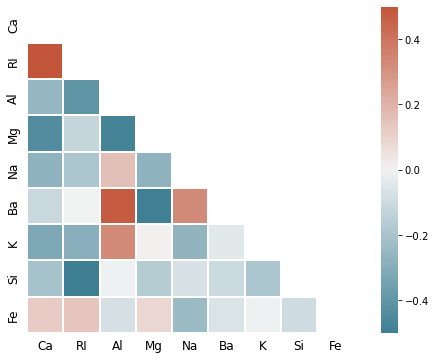

In [177]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
sns.heatmap(
    corr_matrix,
    mask = mask,
    # annot = True,
    linewidth = 2,
    square = True,
    center = 0,
    vmin = -.5,
    vmax = .5,
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

### 12.3 Dimension Reduction

In [264]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

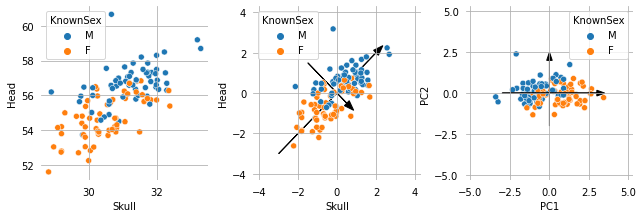

In [335]:
blue_jays = pd.read_csv(os.path.join('data','blue_jays.csv'))
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (9,3))
plt.tight_layout()
sns.scatterplot(
    data = blue_jays,
    x = 'Skull',
    y = 'Head',
    hue = 'KnownSex',
    ax = ax1,
    )

ax1.spines[:].set_visible(False)
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.grid()

scaler = StandardScaler()
blue_jays[['Head','Skull']] = scaler.fit_transform(blue_jays[['Head','Skull']])
pca = PCA(n_components = 2).fit(blue_jays[['Head','Skull']])
ax2.grid()
comps = pca.components_
exp_var = pca.explained_variance_

comp0 = comps[0,:]*exp_var[0]
comp1 = comps[1,:]*exp_var[1]

x11 = -3
y11 = comp0[1]/comp0[0]*x11

dx12 = 5
dy12 = comp0[1]/comp0[0]*x12

x21 = -1.5
y21 = comp1[1]/comp1[0]*x21

dx22 = 2
dy22 = comp1[1]/comp1[0]*x22

ax2.arrow(
    x11,
    y11,
    dx12,
    dy12,
    head_width = 0.35,
    head_length = 0.5,
    color = 'k'
)

ax2.arrow(
    x21,
    y21,
    dx22,
    dy22,
    head_width = 0.35,
    head_length = 0.5,
    color = 'k'
)

sns.scatterplot(
    data = blue_jays,
    x = 'Skull',
    y = 'Head',
    hue = 'KnownSex',
    ax = ax2,
)
    
ax2.spines[:].set_visible(False)
ax2.set_ylim([-4.3,4.3])
ax2.set_xlim([-4.3,4.3])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')


transf_features = pca.transform(blue_jays[['Head','Skull']])
blue_jays[['PC1','PC2']] = transf_features
sns.scatterplot(
    data = blue_jays,
    x = 'PC1',
    y = 'PC2',
    hue = 'KnownSex',
    ax = ax3
    )
ax3.grid()
ax3.spines[:].set_visible(False)    
ax3.set_ylim([-5.3,5.3])
ax3.set_xlim([-5.3,5.3])
ax3.xaxis.set_ticks_position('none')
ax3.yaxis.set_ticks_position('none')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(2.5))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
ax3.arrow(-3.0,0.0,6.0,0.0,head_width = 0.35,head_length = 0.5, color = 'k')
ax3.arrow(0.0,-2.0,0.0,4.0,head_width = 0.35,head_length = 0.5, color = 'k')


In [350]:
forensic_glass_data = forensic_glass.iloc[:,:-1]
pca = PCA(n_components = 2).fit(forensic_glass_data)
X = pca.transform(forensic_glass_data)
transf_data = pd.DataFrame(X,columns = ['PC1','PC2'])
transf_data['Type'] = forensic_glass['type']

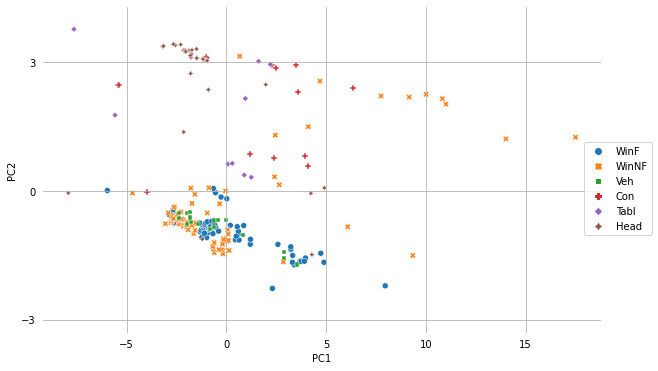

In [376]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
sns.scatterplot(
    data = transf_data,
    x = 'PC1',
    y = 'PC2',
    hue = 'Type',
    style = 'Type',
    # size = 20,
    ax = ax
)
ax.spines[:].set_visible(False)
ax.set_ylim([-3.3, 4.3])
ax.grid()
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.legend(bbox_to_anchor=(1.1,0.6))
ax.yaxis.set_major_locator(ticker.MultipleLocator(3))

### 12.4 Paired Data

In [380]:
CO2_emissions = pd.read_csv(os.path.join('data','CO2_emissions.csv'))

In [386]:
CO2_emissions_2010= CO2_emissions[CO2_emissions['year']==2010]
CO2_emissions_1970= CO2_emissions[CO2_emissions['year']==1970]
CO2_emissions_merge = pd.merge(CO2_emissions_2010, CO2_emissions_1970, right_on = 'country', left_on = 'country', how = 'inner')

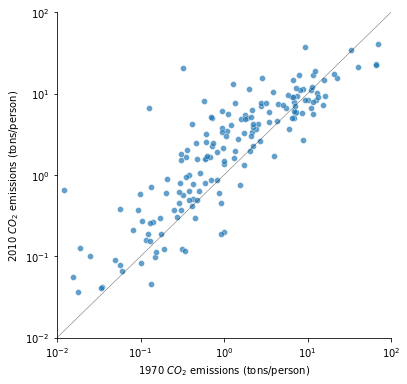

In [422]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
sns.scatterplot(
    data = CO2_emissions_merge,
    x = 'emissions_y',
    y = 'emissions_x',
    alpha = 0.7
)
ax.set_ylim([0.0099,101])
ax.set_xlim([0.0099,101])
plt.xscale('log')
plt.yscale('log')
ax.set_xlabel('1970 $CO_2$ emissions (tons/person)')
ax.set_ylabel('2010 $CO_2$ emissions (tons/person)')
ax.minorticks_off()
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot([0,100],[0,100],color='k',alpha = 0.6, linewidth = .5)

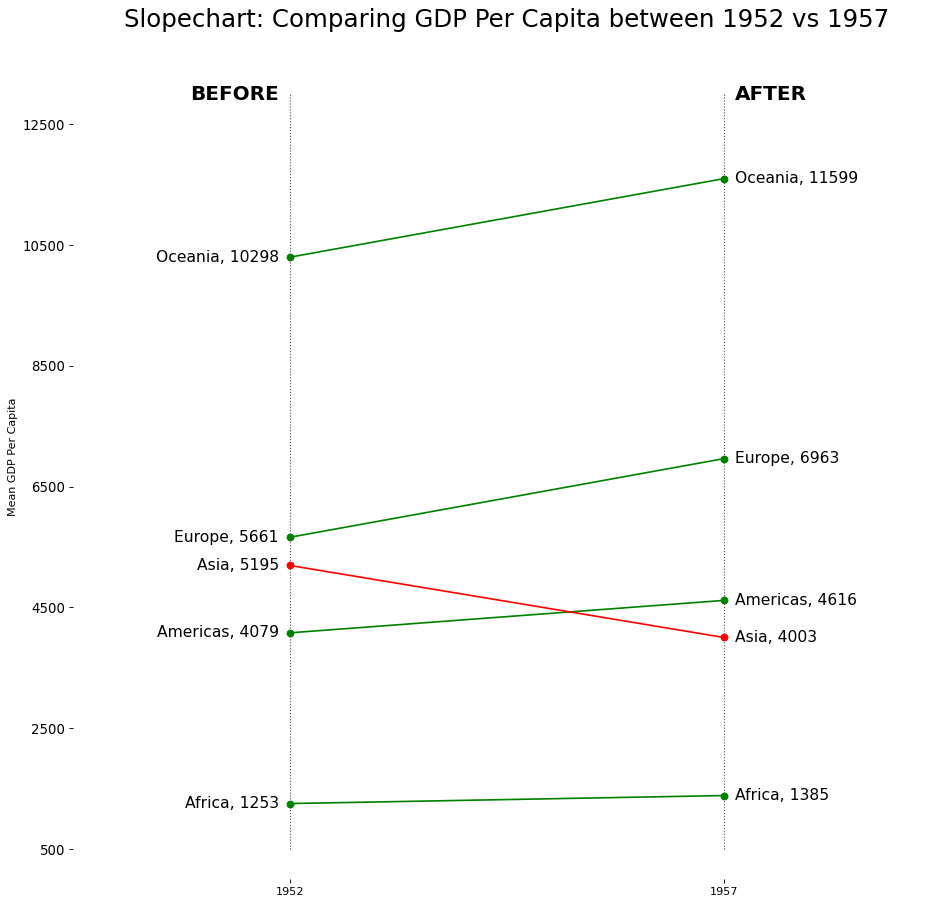

In [435]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

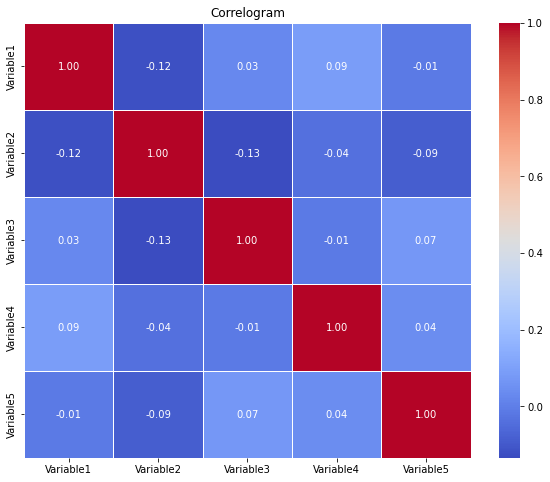

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (Replace this with your own dataset)
data = pd.DataFrame({
    'Variable1': np.random.rand(100),
    'Variable2': np.random.rand(100),
    'Variable3': np.random.rand(100),
    'Variable4': np.random.rand(100),
    'Variable5': np.random.rand(100)
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap (correlogram) using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlogram')
plt.show()


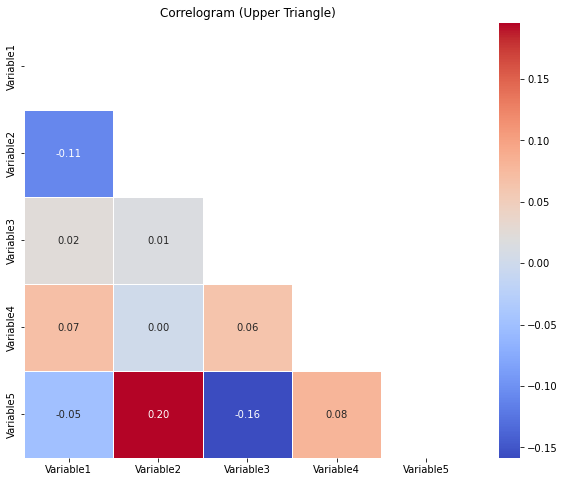

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (Replace this with your own dataset)
data = pd.DataFrame({
    'Variable1': np.random.rand(100),
    'Variable2': np.random.rand(100),
    'Variable3': np.random.rand(100),
    'Variable4': np.random.rand(100),
    'Variable5': np.random.rand(100)
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap (correlogram) using seaborn, masking the lower triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Correlogram (Upper Triangle)')
plt.show()


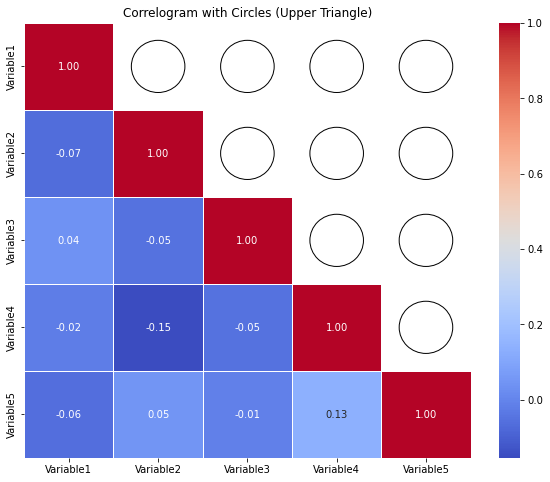

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Sample data (Replace this with your own dataset)
data = pd.DataFrame({
    'Variable1': np.random.rand(100),
    'Variable2': np.random.rand(100),
    'Variable3': np.random.rand(100),
    'Variable4': np.random.rand(100),
    'Variable5': np.random.rand(100)
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a circular mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Create a heatmap (correlogram) using seaborn, masking the upper triangle with circles
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)

# Add circular cutouts to the heatmap
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if mask[i, j]:
            circle = Circle((j + 0.5, i + 0.5), 0.3, facecolor='white', edgecolor='black')
            plt.gca().add_patch(circle)

plt.title('Correlogram with Circles (Upper Triangle)')
plt.show()


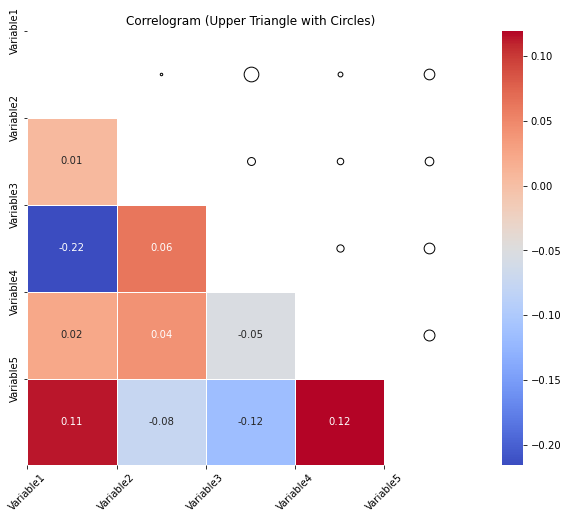

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (Replace this with your own dataset)
data = pd.DataFrame({
    'Variable1': np.random.rand(100),
    'Variable2': np.random.rand(100),
    'Variable3': np.random.rand(100),
    'Variable4': np.random.rand(100),
    'Variable5': np.random.rand(100)
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)

# Plot circles over the heatmap
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        plt.scatter(j + 0.5, i + 0.5, s=1000 * abs(correlation_matrix.iloc[i, j]), color='white', edgecolor='black')

plt.title('Correlogram (Upper Triangle with Circles)')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()



<AxesSubplot:>

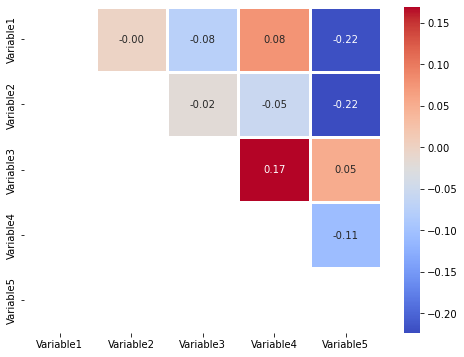

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (Replace this with your own dataset)
data = pd.DataFrame({
    'Variable1': np.random.rand(100),
    'Variable2': np.random.rand(100),
    'Variable3': np.random.rand(100),
    'Variable4': np.random.rand(100),
    'Variable5': np.random.rand(100)
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, square=False, cmap='coolwarm', fmt='.2f', linewidths=3, mask=mask)

# Plot circles over the heatmap
# for i in range(len(correlation_matrix)):
#     for j in range(i + 1, len(correlation_matrix)):
#         plt.scatter(j + 0.5, i + 0.5, s=1000 * abs(correlation_matrix.iloc[i, j]), color='white', edgecolor='black')

# plt.title('Correlogram (Lower Triangle with Circles)')
# plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
# plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
# plt.show()


In [81]:
correlation_matrix

,Variable1,Variable2,Variable3,Variable4,Variable5
Variable1,1.000000,0.133832,0.022393,-0.063948,-0.014000
Variable2,0.133832,1.000000,-0.008763,-0.025814,0.044087
Variable3,0.022393,-0.008763,1.000000,0.201253,-0.108385
Variable4,-0.063948,-0.025814,0.201253,1.000000,-0.060605
Variable5,-0.014000,0.044087,-0.108385,-0.060605,1.000000


In [84]:
np.tril(np.ones_like(correlation_matrix,dtype=bool))

array([[ True, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True]])

In [74]:
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

In [67]:
test = blue_jays[['Head','Mass','Skull']]

In [69]:
test.corr()

,Head,Mass,Skull
Head,1.000000,0.629445,0.667793
Mass,0.629445,1.000000,0.552863
Skull,0.667793,0.552863,1.000000


In [59]:
for ax in axes.axes.flatten():
    print(ax.xaxis.get_label())

Text(0.5, 435.8933333333332, 'Head')
Text(0.5, 435.8933333333332, 'Mass')
Text(0.5, 435.8933333333332, 'Skull')
Text(0.5, 235.04666666666662, 'Head')
Text(0.5, 235.04666666666662, 'Mass')
Text(0.5, 235.04666666666662, 'Skull')
Text(0.5, 17.200000000000003, 'Head')
Text(0.5, 17.200000000000003, 'Mass')
Text(0.5, 17.200000000000003, 'Skull')


In [52]:
labels.replace({'0':'Male','1':"Female"})

AttributeError: 'dict_keys' object has no attribute 'replace'

In [49]:
for i in labels:
    print(i)

0
1


In [51]:
labels()

TypeError: 'dict_keys' object is not callable

In [42]:
axes._legend_data.values()

dict_values([<matplotlib.collections.PathCollection object at 0x7fa6cbec60a0>, <matplotlib.collections.PathCollection object at 0x7fa6cbec66d0>])

In [43]:
axes._legend_data.keys()

dict_keys(['0', '1'])

In [26]:
for a in ax.axes.flatten():
    print(a)

AxesSubplot(0.038953,0.685453;0.300983x0.296831)
AxesSubplot(0.346287,0.685453;0.300983x0.296831)
AxesSubplot(0.65362,0.685453;0.300983x0.296831)
AxesSubplot(0.038953,0.375504;0.300983x0.296831)
AxesSubplot(0.346287,0.375504;0.300983x0.296831)
AxesSubplot(0.65362,0.375504;0.300983x0.296831)
AxesSubplot(0.038953,0.0655556;0.300983x0.296831)
AxesSubplot(0.346287,0.0655556;0.300983x0.296831)
AxesSubplot(0.65362,0.0655556;0.300983x0.296831)


In [9]:
blue_jays

,Unnamed: 0,BirdID,KnownSex,BillDepth,BillWidth,BillLength,Head,Mass,Skull,Sex
0,1,0000-00000,M,8.26,9.21,25.92,56.58,73.30,30.66,1
1,2,1142-05901,M,8.54,8.76,24.99,56.36,75.10,31.38,1
2,3,1142-05905,M,8.39,8.78,26.07,57.32,70.25,31.25,1
3,4,1142-05907,F,7.78,9.30,23.48,53.77,65.50,30.29,0
4,5,1142-05909,M,8.71,9.84,25.47,57.32,74.90,31.85,1
...,...,...,...,...,...,...,...,...,...,...
118,119,962-62176,M,8.70,9.12,24.62,56.61,77.00,31.99,1
119,120,962-62181,M,7.96,9.80,25.07,55.68,68.00,30.61,1
120,121,962-62184,F,7.90,9.30,23.60,53.90,63.90,30.30,0
121,122,962-62185,F,7.63,8.56,24.29,54.19,70.45,29.90,0
